# Introduction to Keras #1
Neural Networks & Deep Learning / Spring 2023, University of Tehran

**Author:** Mohammad Naseri

---

<center>

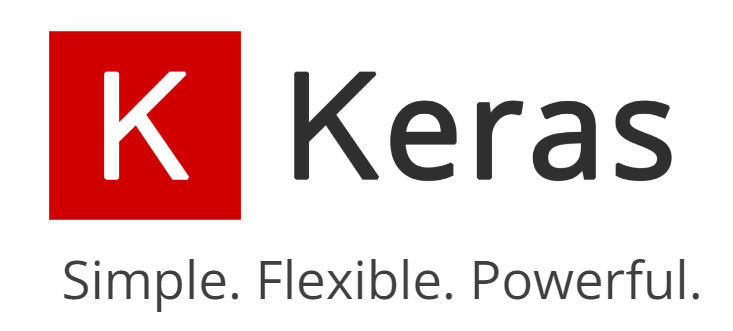
</center>



#2. Data Preparation for MLP Network

Here's a checklist on data preprocessing for machine learning models:

- **Data cleaning:** Remove or correct any invalid, incomplete, duplicated, or irrelevant data points in the dataset. This step is important to ensure that the dataset is of high quality and that the machine learning model is not biased by poor-quality data.

- **Data normalization/standardization:** Scale the data to a common range or distribution, to ensure that features with different scales do not dominate the analysis. This step can also improve the convergence rate of some machine learning algorithms.

- **Data encoding:** Transform categorical data into numerical data, so that machine learning algorithms can process it. Common encoding methods include one-hot encoding and label encoding.

- **Feature engineering:** Create new features from existing ones or select a subset of relevant features. This step can improve the accuracy and speed of the machine learning model by reducing the dimensionality of the input data.

- **Handling missing values:** Determine the best strategy for handling missing data points, such as imputing the missing values with the mean, median, or mode of the data, or deleting the rows with missing values.

- **Data splitting:** Split the dataset into training, validation, and test sets, to evaluate the performance of the machine learning model on new, unseen data.

- **Data augmentation:** Generate new data points from existing ones, by applying transformations such as rotation, translation, or scaling. This step can increase the size of the dataset and improve the robustness of the machine learning model.

- **Data visualization:** Visualize the data to gain insights into the patterns and relationships in the data. This step can also help identify any outliers or anomalies in the data.

Each of these steps is important for data preprocessing, and they should be performed in a sequential and iterative manner, until the desired level of data quality and model performance is achieved.

## 2.1 MNIST dataset loading
Each MNIST data point consists of two components: a label and a picture of a handwritten digit. The labels will be "y" and the photos "x." Both the training set and the test set contain images and the labels that go with them; for instance, the training images are in the filename extension mnist.train.images and the training labels are in the filename extension mnist.train.labels.

In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train[0].shape

(28, 28)

## 2.2 Data Visualization

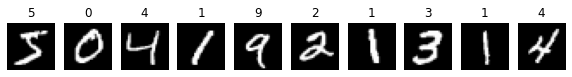

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
    plt.title(str(y_train[i]))

plt.show()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

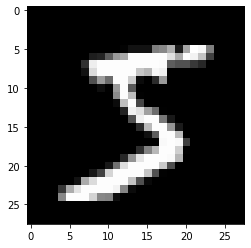

In [4]:
plt.imshow(X_train[0], cmap='gray')
print(X_train[0])

In [5]:
print(f'Train Shape: {X_train.shape}')
print(f'Train Shape: {X_test.shape}')

Train Shape: (60000, 28, 28)
Train Shape: (10000, 28, 28)


## 2.3 Data Reshaping

In [6]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print(f'Train Shape: {X_train.shape}')
print(f'Train Shape: {X_test.shape}')

Train Shape: (60000, 784)
Train Shape: (10000, 784)


In [7]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

## 2.4 Data Normalization

- **Feature scaling/MinMax normalization:** This method scales the features of the input data to a fixed range, usually between 0 and 1, using the formula:


        `X_norm = (X - X_min) / (X_max - X_min)`


where X is the input data, X_min is the minimum value of X, and X_max is the maximum value of X. This method is useful when the input data has different scales and units, and it can improve the convergence of the neural network.

- **Standardization/Z-score normalization:** This method scales the features of the input data to have zero mean and unit variance using the formula:


        `X_norm = (X - X_mean) / X_std`

where X is the input data, X_mean is the mean of X, and X_std is the standard deviation of X. This method is useful when the input data has a Gaussian distribution, and it can improve the convergence of the neural network.

- **PCA-based normalization:** This method applies principal component analysis (PCA) to the input data and normalizes the resulting principal components to have unit variance. This method is useful when the input data has high dimensionality, and it can reduce the computational complexity of the neural network.


In [8]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## 2.5 Label Encoding

- **Ordinal encoding:** This method assigns a unique integer value to each category in the categorical variable, based on the order of the categories. For example, if a categorical variable has the categories "low", "medium", and "high", the method assigns the values 1, 2, and 3, respectively. This method is suitable for ordinal categorical variables, where the order of the categories is meaningful.

- **One-hot encoding:** This method creates a binary feature for each category in the categorical variable, where the feature has a value of 1 if the category is present, and 0 otherwise. For example, if a categorical variable has the categories "red", "green", and "blue", the method creates three binary features, where the first feature has a value of 1 if the color is red, and 0 otherwise, and so on. This method is suitable for nominal categorical variables, where the order of the categories is not meaningful.

- **Count encoding:** This method assigns a unique integer value to each category in the categorical variable, based on the frequency of the category in the data. For example, if a categorical variable has the categories "red", "green", and "blue", and "red" appears 5 times, "green" appears 3 times, and "blue" appears 2 times, the method assigns the values 1, 2, and 3, respectively. This method is suitable for categorical variables where the frequency of the categories is informative.

- **Target encoding:** This method assigns a numerical value to each category in the categorical variable, based on the mean of the target variable for that category. For example, if a categorical variable has the categories "male" and "female", and the target variable is a binary variable indicating whether a person is a smoker or not, the method assigns the mean value of the target variable for each category, i.e., the proportion of smokers among males and females, respectively. This method is suitable for categorical variables where the target variable is informative.

In [9]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

<center>

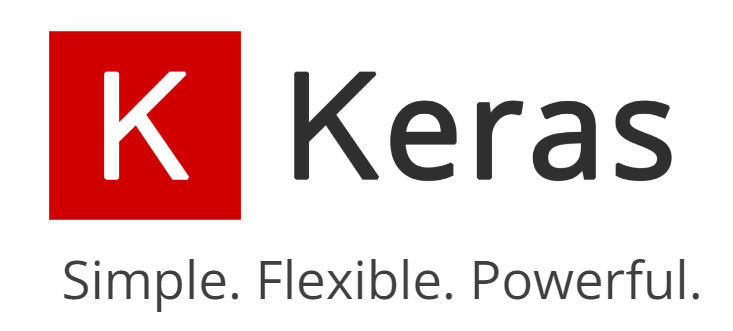
</center>

# 3. Building MLP Model

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation

## 3.0 Setting Up Training Parameters

In [11]:
output_dim = 10

input_dim = X_train.shape[1]

batch_size = 128
nb_epoch = 10

In [12]:
def plot_accuracy(histroy):
    # Plot the training accuracy
    sns.set_style("darkgrid")
    plt.plot(history.history['accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train'], loc='upper left')
    plt.show()

In [13]:
import pandas as pd

def score_table(model):
    score = model.evaluate(X_test, y_test, verbose='0')
    df = pd.DataFrame({'Test Score': [score[0]], 'Test Accuracy': [score[1]]})
    print('\n\n', df, '\n\n')

## 3.1 Softmax Classifier

In softmax classifier, the input is first passed through a linear transformation and then the output is transformed using the softmax function. The softmax function maps the output to a probability distribution over the categories, where the sum of probabilities across all categories is equal to 1. The category with the highest probability is then selected as the predicted output.

Epoch 1/10
469/469 [==============================] - 4s 5ms/step - loss: 1.2667 - accuracy: 0.7063
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.7150 - accuracy: 0.8406
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.5873 - accuracy: 0.8597
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.5259 - accuracy: 0.8686
Epoch 5/10
469/469 [==============================] - 3s 5ms/step - loss: 0.4884 - accuracy: 0.8746
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4627 - accuracy: 0.8798
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4435 - accuracy: 0.8834
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4286 - accuracy: 0.8860
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4166 - accuracy: 0.8887
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4066 - accuracy: 0.8905

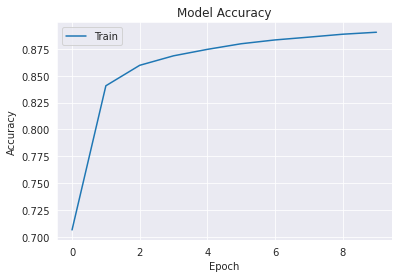

In [14]:
model = Sequential()

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch) 

score_table(model)

plot_accuracy(history)

The purpose of using **Activation Functions** in Keras is to allow the neural network to model complex relationships between the input and output variables. Without activation functions, the output of a neuron would be a linear combination of its inputs, which would limit the expressiveness of the neural network.

- **Sigmoid function:** It maps the input to a range between 0 and 1, and is commonly used in binary classification problems.

- **ReLU (Rectified Linear Unit) function:** It returns the input if it is positive, and 0 otherwise, and is commonly used in deep neural networks.

- **Tanh function:** It maps the input to a range between -1 and 1, and is commonly used in recurrent neural networks.

- **Softmax function:** It maps the input to a probability distribution over multiple categories, and is commonly used in classification problems with more than two categories.

---

**Optimizers** in Keras are algorithms that are used to optimize the weights of a neural network during training by adjusting them in the direction of minimizing the loss function. The loss function measures the difference between the predicted output and the true output, and the goal of the optimizer is to minimize this difference by finding the optimal values of the weights.

- **Stochastic Gradient Descent (SGD):** It is the most basic optimizer that updates the weights based on the gradient of the loss function with respect to the weights.

- **Adam:** It is a popular optimizer that uses a combination of adaptive learning rates and momentum to converge faster and more efficiently than SGD.

- **RMSprop:** It is another popular optimizer that uses a moving average of squared gradients to adapt the learning rate.

- **Adagrad:** It adapts the learning rate based on the frequency of the updates for each weight.

## 3.2 MLP + Sigmoid activation + SGDOptimizer

In [15]:
model_sigmoid = Sequential([
    Dense(512, activation='sigmoid', input_shape=(input_dim,)),
    Dense(128, activation='sigmoid'),
    Dense(output_dim, activation='softmax')
])

model_sigmoid.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 2.2687 - accuracy: 0.2200
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 2.1825 - accuracy: 0.4450
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 2.0718 - accuracy: 0.5769
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 1.9141 - accuracy: 0.6335
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 1.7073 - accuracy: 0.6718
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 1.4801 - accuracy: 0.7030
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 1.2710 - accuracy: 0.7352
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 1.0996 - accuracy: 0.7609
Epoch 9/10
469/469 [==============================] - 2s 3ms/step - loss: 0.9669 - accuracy: 0.7822
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.8647 - accuracy: 0.7998

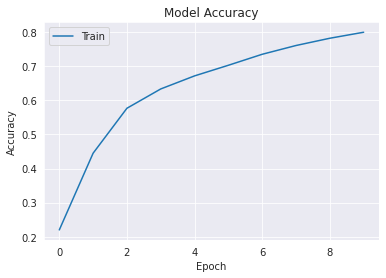

In [16]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch)

score_table(model_sigmoid)

plot_accuracy(history)

## 3.3 MLP + Sigmoid activation + ADAM


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.5392 - accuracy: 0.8595
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2233 - accuracy: 0.9352
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1659 - accuracy: 0.9509
Epoch 4/10
4

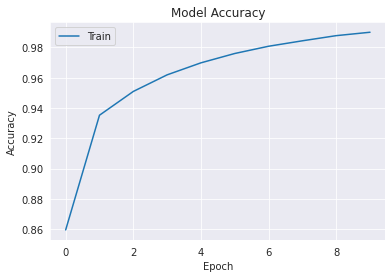

In [17]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch)

score_table(model_sigmoid)

plot_accuracy(history)

## 3.4 MLP + ReLU + ADAM

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 512)               401920    
                                                                 
 dense_8 (Dense)             (None, 128)               65664     
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


    Test Score  Test Accuracy
0    0.083617         0.9806 




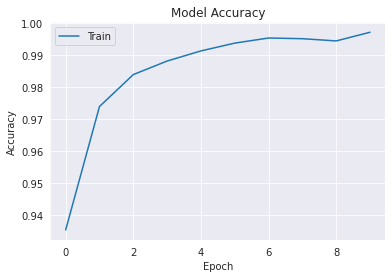

In [18]:
from tensorflow.keras.initializers import RandomNormal


model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose='0')

score_table(model_relu)

plot_accuracy(history)

## 3.5 Fine-tuning the MLP model based on the evaluation results

<center>

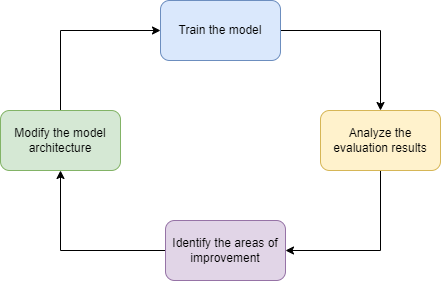
</center>

<center>

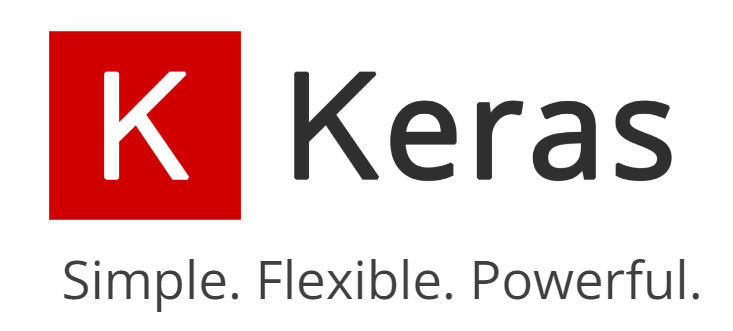
</center>

# 4. Regularization Techniques

**Regularization techniques** are used in deep neural networks, including those built using Keras, to prevent overfitting during training by adding constraints on the weights of the neural network. There are several regularization techniques available in Keras, including:

- **L1 Regularization:** It adds a penalty term to the loss function proportional to the absolute value of the weights, which encourages the neural network to learn sparse features.

- **L2 Regularization:** It adds a penalty term to the loss function proportional to the square of the weights, which encourages the neural network to learn small weights and smooth feature maps.

- **Dropout:** It randomly drops out a fraction of the neurons in a layer during each training iteration, forcing the network to learn more robust features and prevent overfitting.

- **Batch Normalization:** It normalizes the inputs of each layer by adjusting and scaling them using the statistics of the current batch, which reduces the internal covariate shift and helps to prevent overfitting.

- **Early stopping:** It monitors the performance of the neural network on a validation set and stops training when the performance starts to degrade, which prevents overfitting.

- **Data Augmentation:** It increases the size of the training dataset by applying random transformations to the input images, which helps to prevent overfitting and improve the generalization performance of the neural network.

These regularization techniques can be combined and customized in various ways to optimize the performance of the neural network for a given problem. In Keras, regularization techniques can be easily added to the neural network model as layers or as arguments to the optimizer.

### 4.1 MLP + Batch-Norm on hidden Layers + Adam

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_14 (Dense)            (None, 128)               65664     
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 471,434
Trainable params: 470,154
Non-tr

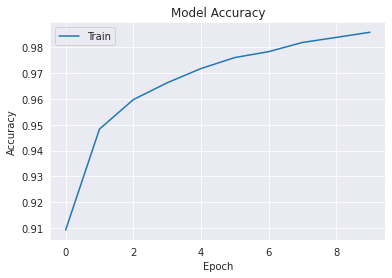

In [20]:
from tensorflow.keras.layers import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()


model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose='0')


score_table(model_batch)

plot_accuracy(history)

## 4.2 MLP + Dropout + AdamOptimizer




Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_4 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               65664     
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)              

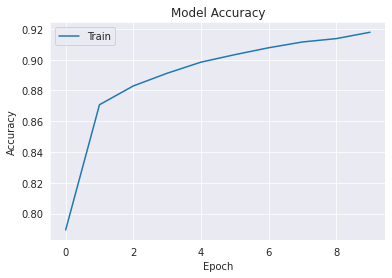

In [21]:
from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose='0')


score_table(model_drop)

plot_accuracy(history)

## 4.3 MLP + Dropout + AdamOptimizer + EarlyStopping

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_8 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_23 (Dense)            (None, 128)               65664     
                                                                 
 batch_normalization_9 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 128)              

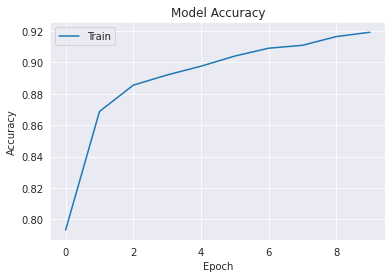

In [23]:
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# define early stopping
early_stopping = EarlyStopping(monitor='loss', patience=5)

history = model_drop.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose='0', callbacks=[early_stopping])


score_table(model_drop)

plot_accuracy(history)

<center>

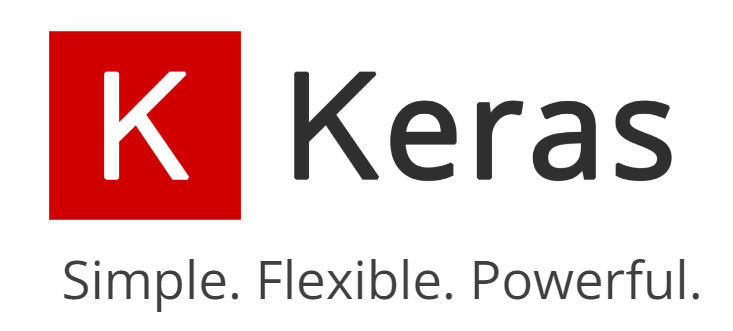
</center>

# 5. Hyperparamet Fine-Tuning

- **Number of layers:** This hyperparameter specifies the number of hidden layers in the network. More layers can make the model more complex and potentially more accurate, but also harder to train and more prone to overfitting.

- **Number of neurons per layer:** This hyperparameter specifies the number of neurons in each hidden layer. More neurons can make the model more powerful, but can also increase the risk of overfitting and make training more difficult.

- **Activation function:** This hyperparameter specifies the activation function used in each layer. Common choices include ReLU, sigmoid, and tanh, and each has its own strengths and weaknesses.

- **Learning rate:** This hyperparameter controls how much the weights are updated during training. A larger learning rate can help the model converge faster, but may also cause instability and prevent convergence. A smaller learning rate may be more stable, but may take longer to converge.

- **Optimization algorithm:** This hyperparameter specifies the algorithm used to update the weights during training. Common choices include stochastic gradient descent (SGD), Adam, and RMSprop, and each has its own strengths and weaknesses.

- **Loss function:** This hyperparameter specifies the function used to measure the difference between the predicted and actual values during training. Common choices include mean squared error (MSE), binary cross-entropy, and categorical cross-entropy, and each is appropriate for different types of problems.

- **Regularization:** This hyperparameter specifies techniques used to prevent overfitting, such as L1 and L2 regularization or dropout.

- **Batch size:** This hyperparameter specifies the number of samples used in each batch during training. A larger batch size can speed up training, but can also reduce generalization and cause instability.

- **Number of epochs:** This hyperparameter specifies the number of times the model will be trained on the entire training dataset. Increasing the number of epochs can improve accuracy, but can also increase overfitting and training time.

- **Validation split:** This hyperparameter specifies the fraction of the training data to be used for validation during training.

**Hyperparameter Tuning** is the process of selecting the optimal values of the hyperparameters for a machine learning algorithm. There are several techniques that can be used for hyperparameter tuning, including:

- **Grid search:** In grid search, a set of hyperparameters and their respective values are defined, and a model is trained and evaluated for each combination of hyperparameters. This method can be exhaustive and computationally expensive, but it guarantees to find the best combination of hyperparameters within the specified range.

- **Random search:** In random search, hyperparameters and their respective values are randomly selected within a specified range. This method is less computationally expensive than grid search, but may not guarantee to find the best combination of hyperparameters.

- **Bayesian optimization:** Bayesian optimization is an approach that builds a probabilistic model of the objective function, which captures the relationship between the hyperparameters and the performance metric. The model is used to select the next set of hyperparameters to evaluate based on the expected improvement in the objective function. This method can be computationally efficient and effective in high-dimensional search spaces.

- **Genetic algorithms:** Genetic algorithms use evolutionary principles to search for the optimal set of hyperparameters. This method starts with a population of random sets of hyperparameters and evolves new populations by selecting and breeding sets of hyperparameters with the best performance. This method can be computationally expensive but can be effective in complex search spaces.

- **Gradient-based optimization:** Gradient-based optimization uses the gradient of the objective function with respect to the hyperparameters to search for the optimal set of hyperparameters. This method requires a differentiable objective function and can be computationally expensive, but can be effective in low-dimensional search spaces.

- **Ensemble-based optimization:** Ensemble-based optimization combines the predictions of multiple models, each trained with a different set of hyperparameters, to make a final prediction. This method can be computationally expensive, but can be effective in improving generalization and robustness.

## 5.1 GridSearchCV

In [24]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [25]:
def create_model(optimizer='adam', activation='relu', neurons=1):
    model = Sequential()
    model.add(Dense(neurons,  activation=activation, input_shape=(input_dim,)))
    model.add(Dense(output_dim, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [26]:
model = KerasClassifier(build_fn=create_model, verbose=0)

<ipython-input-26-7b0f05354f25>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [27]:
param_grid = {'optimizer': ['adam', 'sgd'], 
              'activation': ['relu', 'sigmoid'], 
              'neurons': [16, 32, 64]}

In [28]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

In [29]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.936917 using {'activation': 'relu', 'neurons': 64, 'optimizer': 'adam'}


In [30]:
best_model = create_model(optimizer=grid_result.best_params_['optimizer'], 
                          activation=grid_result.best_params_['activation'], 
                          neurons=grid_result.best_params_['neurons'])
best_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

In [39]:
loss, accuracy = best_model.evaluate(X_test, y_test)
print('accuracy of best model is', accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0862 - accuracy: 0.9752
accuracy of best model is 0.9751999974250793


## 5.2 RandomizedSearchCV

In [40]:
from scipy.stats import randint, uniform

param_dist = {'optimizer': ['adam', 'sgd'], 
              'activation': ['relu', 'sigmoid'], 
              'neurons': [16, 32, 64]}

In [41]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
                                   n_iter=10, cv=3, n_jobs=-1, random_state=42)

random_result = random_search.fit(X_train, y_train)

In [42]:
best_model = create_model(optimizer=random_result.best_params_['optimizer'], 
                          activation=random_result.best_params_['activation'], 
                          neurons=random_result.best_params_['neurons'])
best_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

In [43]:
loss, accuracy = best_model.evaluate(X_test, y_test)
print('accuracy of best model is', accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0855 - accuracy: 0.9743
accuracy of best model is 0.9743000268936157
